In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202222          7  21286    16284   26288      32          24   
1     202221          7  19889    15896   23882      30          24   
2     202220          7  23585    19004   28166      36          29   
3     202219          7  18593    14181   23005      28          21   
4     202218          7  17851    13963   21739      27          21   
5     202217          7  20314    16001   24627      31          24   
6     202216          7  19660    14860   24460      30          23   
7     202215          7  17799    13715   21883      27          21   
8     202214          7  17005    13162   20848      26          20   
9     202213          7  15448    11659   19237      23          17   
10    202212          7  14702    10794   18610      22          16   
11    202211          7  11729     8347   15111      18          13   
12    202210          7  13314    10036   16592      20          15   
13    202209          7  10485     7600   13370      16          12   
14    202208          7  12088     8741   15435      18          13   
15    202207          7  14003    10789   17217      21          16   
16    202206          7   9798     7048   12548      15          11   
17    202205          7  10851     7797   13905      16          11   
18    202204          7   9547     6721   12373      14          10   
19    202203          7  13972    10680   17264      21          16   
20    202202          7   8495     6026   10964      13           9   
21    202201          7  13793    10597   16989      21          16   
22    202152          7  13239     9611   16867      20          15   
23    202151          7  13326     9629   17023      20          14   
24    202150          7  14128    10312   17944      21          15   
25    202149          7  13674    10369   16979      21          16   
26    202148          7  11549     8503   14595      17          12   
27    202147          7  11419     8376   14462      17          12   
28    202146          7   8216     5724   10708      12           8   
29    202145          7   8965     6468   11462      14          10   
...      ...        ...    ...      ...     ...     ...         ...   
1614  199126          7  17608    11304   23912      31          20   
1615  199125          7  16169    10700   21638      28          18   
1616  199124          7  16171    10071   22271      28          17   
1617  199123          7  11947     7671   16223      21          13   
1618  199122          7  15452     9953   20951      27          17   
1619  199121          7  14903     8975   20831      26          16   
1620  199120          7  19053    12742   25364      34          23   
1621  199119          7  16739    11246   22232      29          19   
1622  199118          7  21385    13882   28888      38          25   
1623  199117          7  13462     8877   18047      24          16   
1624  199116          7  14857    10068   19646      26          18   
1625  199115          7  13975     9781   18169      25          18   
1626  199114          7  12265     7684   16846      22          14   
1627  199113          7   9567     6041   13093      17          11   
1628  199112          7  10864     7331   14397      19          13   
1629  199111          7  15574    11184   19964      27          19   
1630  199110          7  16643    11372   21914      29          20   
1631  199109          7  13741     8780   18702      24          15   
1632  199108          7  13289     8813   17765      23          15   
1633  199107          7  12337     8077   16597      22          15   
1634  199106          7  10877     7013   14741      19          12   
1635  199105          7  10442     6544   14340      18          11   
1636  199104          7   7913     4563   11263      14           8   
1637  199103          7  15387    10484   20290      27          18   
1638  199102          7  16277  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

**This csv file of chickenpox_data does not have any missing data, so No year entry has been deleted
The code line that was used to remove the year entry has been commented out**

In [5]:
# data = raw_data.dropna().copy()
data = raw_data

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [7]:
 sorted_data = data.set_index('period').sort_index()

In [8]:
 periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

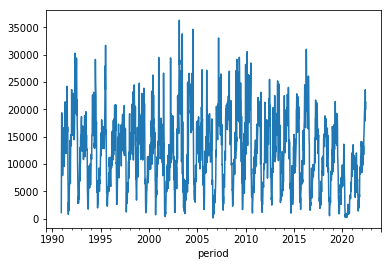

In [9]:
 sorted_data['inc'].plot()

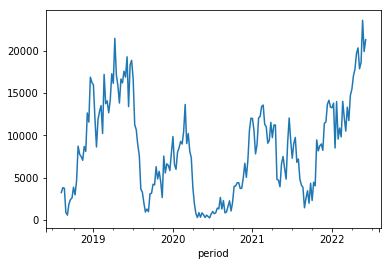

In [10]:
sorted_data['inc'][-200:].plot()

**we need to start from Ist of september so below 8 has been replaced with 9
Also the current data set is from 1990 to 2022, so we give 1991 the starting year to consider the year with full peak of the epidemic as described by the instructiors of the code
--- Replaced 1985 by 1991**

In [11]:
first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

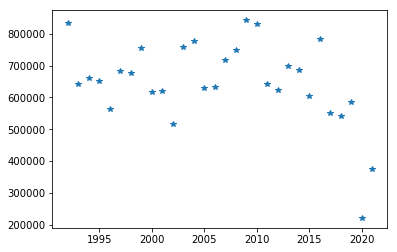

In [13]:
 yearly_incidence.plot(style='*')

In [14]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

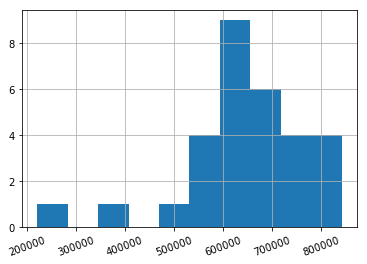

In [15]:
 yearly_incidence.hist(xrot=20)